# Aula 3 Ex1 - Rede Neural Convolucional: Classificar MNIST

In [110]:
import keras
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from keras import optimizers
import numpy as np
import sys
import os

In [111]:
%matplotlib inline

In [112]:
plt.style.use("ggplot")

# 1. Carregar MNIST data

Nesse caso, selecionamos as 6000 primeiras imagens do dataset de treino.

In [113]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [114]:
X_train = X_train[:6000]
Y_train = Y_train[:6000]

In [115]:
print("Shape X treino:", X_train.shape)

('Shape X treino:', (6000, 28, 28))


In [116]:
print("Shape Y treino:", Y_train.shape)

('Shape Y treino:', (6000,))


In [117]:
print("Shape X treino:", X_test.shape)

('Shape X treino:', (10000, 28, 28))


In [118]:
print("Shape Y teste:", Y_test.shape)

('Shape Y teste:', (10000,))


In [119]:
dim1, dim2 = X_train.shape[1], X_train.shape[2] # 28, 28

In [120]:
n_class = 10

## 1.1 Visualização

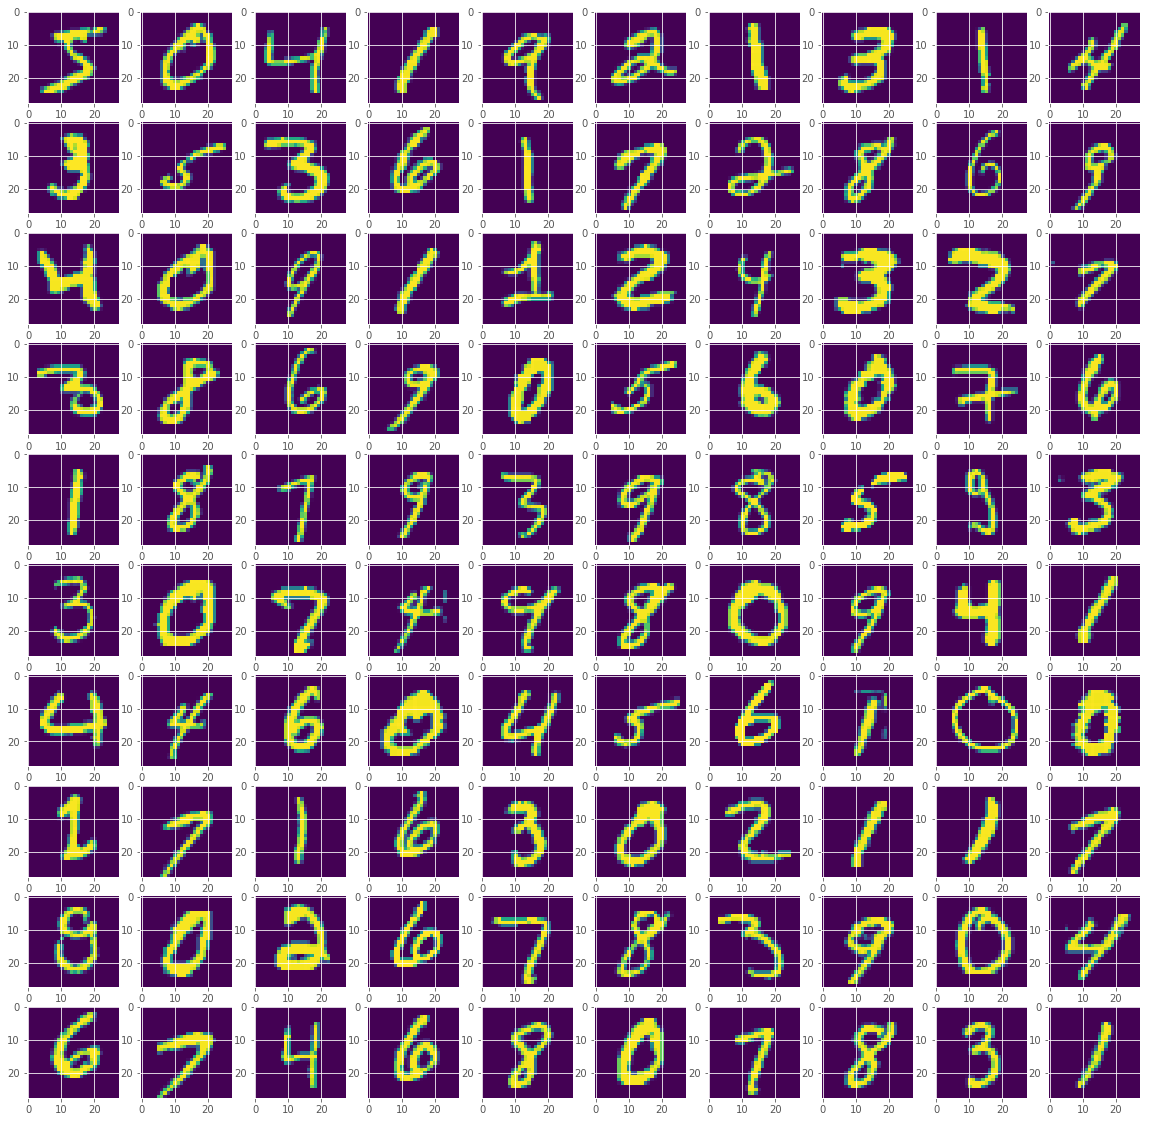

In [121]:
fig = plt.figure(figsize=(20,20))

columns=10
rows=10

img_idx = 0

for i in range(1, columns*rows+1):
    
    img = X_train[img_idx]
    
    fig.add_subplot(rows, columns, i)

    plt.imshow(img)
        
    img_idx = img_idx + 1

# 2. Reshape dos dados: formato X e Y para treino

**Se fossemos utilizar algum algoritmo que espera tabela (MLP, SVM, kNN, Random Forest), utilizariamos o método abaixo:**
Nossa base de dados veio asssm: 60000 quadradinhos de 28x28 (imagens). Queremos transformar isso para um formato de "tabela" em que cada pixel da imagem será uma feature do modelo. Então, precisamos aplicar uma transformação que pegue os pixels de uma imagem e transforme isso em 28x28 features de uma observação.

Como a CNN faz uso da espacialidade, temos que fornecer estes dados em outro formato.

In [122]:
#X_train = X_train.reshape((X_train.shape[0], -1))

In [123]:
#X_test = X_test.reshape((X_test.shape[0], -1))

Observamos então que nosso dado de treino é agora uma tabela com 60000 observações e 784 features.

In [124]:
print("Shape X treino:", X_train.shape)

('Shape X treino:', (6000, 28, 28))


In [125]:
Y_train = keras.utils.to_categorical(Y_train, n_class)
Y_test = keras.utils.to_categorical(Y_test, n_class)

In [126]:
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)

# 3. Normalizar os dados da imagem usando método MinMax 

Isso ajuda nosso modelo a convergir mais rápido e evitar problemas com vanishing ou exploding gradient.

In [127]:
X_train = X_train.astype('float64') / 255.0

In [128]:
X_test = X_test.astype('float64') / 255.0

# 4. Definindo arquitetura da Rede Neural Convolucional

In [129]:
model = Sequential()

## 4.1 Etapa de Convolução: extração de features

Na etapa de convolução aplica-se um filtro linear em que cada pixel da janela móvel sobre a imagem de treino é multiplicado pelos pesos do kernel. A soma dos produtos da janela móvel com o kernel é atribuída a outra imagem. 

<img src="teste.png">
    

In [130]:
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=(dim1, dim2, 1) ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

## 4.2 Etapa Densa: rede neural convencional

Nessa etapa teremos uma Rede Neural do tipo MLP que classificará então as imagens obtidas após a etapa de extração de features na convolução. 

In [131]:
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(n_class, activation='softmax'))

# 5. Compilar e Fitar

## 5.1 Otimizador

Utilizaremos o Adam

In [132]:
opt=optimizers.Adam()

## 5.2 Compilar o modelo

In [133]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## 5.3 Fit do modelo

In [134]:
model.fit(X_train, Y_train, batch_size=20, epochs=60, verbose=2)

Epoch 1/60
 - 8s - loss: 0.3840 - acc: 0.8813
Epoch 2/60
 - 7s - loss: 0.1144 - acc: 0.9645
Epoch 3/60
 - 8s - loss: 0.0648 - acc: 0.9812
Epoch 4/60
 - 10s - loss: 0.0505 - acc: 0.9835
Epoch 5/60
 - 9s - loss: 0.0368 - acc: 0.9880
Epoch 6/60
 - 9s - loss: 0.0360 - acc: 0.9890
Epoch 7/60
 - 8s - loss: 0.0360 - acc: 0.9888
Epoch 8/60
 - 8s - loss: 0.0125 - acc: 0.9957
Epoch 9/60
 - 8s - loss: 0.0133 - acc: 0.9973
Epoch 10/60
 - 8s - loss: 0.0136 - acc: 0.9967
Epoch 11/60
 - 8s - loss: 0.0230 - acc: 0.9930
Epoch 12/60
 - 8s - loss: 0.0240 - acc: 0.9922
Epoch 13/60
 - 8s - loss: 0.0189 - acc: 0.9950
Epoch 14/60
 - 8s - loss: 0.0118 - acc: 0.9962
Epoch 15/60
 - 8s - loss: 0.0078 - acc: 0.9982
Epoch 16/60
 - 8s - loss: 0.0224 - acc: 0.9945
Epoch 17/60
 - 8s - loss: 0.0210 - acc: 0.9942
Epoch 18/60
 - 8s - loss: 0.0028 - acc: 0.9997
Epoch 19/60
 - 8s - loss: 6.0483e-05 - acc: 1.0000
Epoch 20/60
 - 8s - loss: 1.4815e-05 - acc: 1.0000
Epoch 21/60
 - 8s - loss: 6.8389e-06 - acc: 1.0000
Epoch 22/

# 6. Avaliando o modelo

Utilizando acurácia

- 1º tentativa: 0.9805 (ex. aula)
<br>
- 2º tenativa: diminuir batch_size para 50: 0.9836
<br>
- 3º tentativa: diminuir numeros de neuronios MLP para 128: 0.9820
<br>
- 4º tentativa: numero de neuronios MLP 300:  0.9820
<br>
- 5º tentativa: numero de neuronios MLP 1000, batch size 50, e epoch 60: 0.984
<br>
- 6º tentativa: numero de neuronios MLP 1000, outra camada com 500 neurons, batch size 50, e epoch 60: 0.9855
<br>
- 6º tentativa: numero de neuronios MLP 1000, outra camada com 500 neurons, batch size 50, e epoch 120: 0.9851
<br>
- **7º tentativa: numero de neuronios MLP 1000, outra camada com 500 neurons, batch size 20, e epoch 60: 0.985**

In [135]:
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.10958027628976924)
('Test accuracy:', 0.985)
